In [6]:
import torch
from time import time

a = torch.ones(1000)
b = torch.ones(1000)

In [2]:
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i]+b[i]
print(time()-start)

0.03291201591491699


In [3]:
start = time()
d = a+b
print(time()-start)

0.0


torch中arr相加的效率比用索引想加要快很多，1000个数相差100倍

In [7]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import random

num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.randn(num_examples,num_inputs,dtype=torch.float32)
labels = true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)
print(features[0],labels[0])


tensor([-0.2944,  1.0455]) tensor(0.0584)


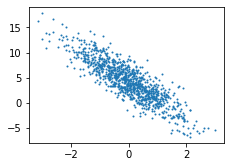

In [10]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5,2.5)):
    #use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

In [19]:
import torch.utils.data as data
batch_size = 10
dataset = data.TensorDataset(features,labels)

data_iter = data.DataLoader(dataset,batch_size,shuffle=True)

# for x,y in data_iter:
#     print(x,y)
#     break

TypeError: 'DataLoader' object is not subscriptable

In [23]:
class LinearNet(torch.nn.Module):
    def __init__(self,n_feature):
        super(LinearNet, self).__init__()
        self.linear = torch.nn.Linear(n_feature,1)
    def forward(self,x):
        y = self.linear(x)
        return y
# net = LinearNet(num_inputs)
# print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [26]:
net = torch.nn.Sequential(
    torch.nn.Linear(num_inputs,1)
)

In [27]:
from torch import nn
from torch.nn import init
init.normal_(net[0].weight,mean=0,std=0.01)
init.constant_(net[0].bias,val=0)

loss = nn.MSELoss()

In [28]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(),lr=0.03)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [29]:
num_epochs = 3
for epoch in range(1,num_epochs+1):
    for x,y in data_iter:
        output = net(x)
        l = loss(output,y.view(-1,1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d,loss: %f' % (epoch,l.item()))
    

epoch 1,loss: 0.000237
epoch 2,loss: 0.000107
epoch 3,loss: 0.000038


In [31]:
import torch
import random
import zipfile

with zipfile.ZipFile('jaychou_lyrics.txt.zip') as zin:
    with zin.open('jaychou_lyrics.txt') as f:
        corpus_chars = f.read().decode('utf-8')
corpus_chars[:40]

'想要有直升机\n想要和你飞到宇宙去\n想要和你融化在一起\n融化在宇宙里\n我每天每天每'

In [32]:
corpus_chars = corpus_chars.replace('\n',' ').replace('\r',' ')
corpus_chars = corpus_chars[:10000]


In [1]:
import torch
x = torch.rand((2,5))
def softmax(x):
    x_exp = x.exp()
    partition = x_exp.sum(dim=1,keepdim=True)
    return x_exp/partition
x_prob = softmax(x)
print(x_prob,x_prob.sum(dim=1))

tensor([[0.3014, 0.1653, 0.1414, 0.2406, 0.1514],
        [0.1389, 0.1793, 0.2012, 0.2838, 0.1968]]) tensor([1.0000, 1.0000])


SOFTMAX
